### Feel free to comment any suggestions or criticism you might have. Please refer to the table of contents below for structural navigation. 
## Upvote and share if you find the notebook useful! Thank you :)
# Table of contents:
*  [Intro](#intro)
*  [Exploring the training data](#exp)
*  [Analysis of "Relevant Fields"](#analy)
    *  [ebird](#ebird)
    *  [location](#location)
    *  [recordist](#recordist)
*  [Audio Representation](#panaly)
    *  [Waveform or PCM](#wav)
    *  [Spectrogram](#stft)
*  [Audio Feature Extraction](#panaly2)
    *  [Spectral Centroid](#sc)
    *  [Spectral Roll-off](#srf)
    *  [Spectral Bandwidth](#sbw)
    *  [Spectral Flux](#sf)
    *  [Spectral Contrast](#spc)
    *  [Spectral Flatness](#scf)
    *  [Zero-crossing rate](#zcr)
    *  [Autocorrelation](#acr)
     *  [Fundamental Frequency](#ff)
     *  [Tempo Estimation](#tmp)
    *  [Mel-Frequency Cepstral Coefficients](#mfcc)
    *  [Chromogram](#chr)
*  [References](#ref)
*  [Further Readings](#fread)





<a id='intro'></a>
# Introduction

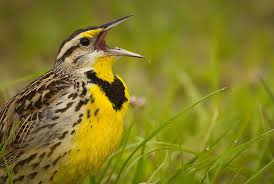

Bird vocalization includes both bird calls and bird songs. In non-technical use, bird songs are the bird sounds that are melodious to the human ear. The distinction between songs and calls is based upon complexity, length, and context. Songs are longer and more complex and are associated with territory and courtship and mating, while calls tend to serve such functions as alarms or keeping members of a flock in contact. 

![image2.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTjPnT44Pn2snp1K4_vd6fCV4nxZ3G6sNKwumvB0Ozwl2ClfU32&usqp=CAU)

Song is usually delivered from prominent perches, although some species may sing when flying (we find such recordings in the training data).

<a id='ppc'></a>
## Purpose behind calls & songs:

![image3.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTmnh5r_gp6awtDn2vaOnJQXqibzRDqWuES_VE5PJprlLoV7GoU&usqp=CAU)
* One of the two main functions of bird song is mate attraction. Experiments also suggest that parasites and diseases may directly affect song characteristics such as song rate, which thereby act as reliable indicators of health. Therefore, a female bird may select males based on the quality of their songs and the size of their song repertoire.

![image4.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSemLGq1ZjK2grpBuizpAZKqmgOo1FD--inpuL1lxrvZ16XVyBw&usqp=CAU)
* The second principal function of bird song is territory defense. Territorial birds will interact with each other using song to negotiate territory boundaries. Since song may be a reliable indicator of quality, individuals may be able to discern the quality of rivals and prevent an energetically costly fight. Song complexity is also linked to male territorial defense, with more complex songs being perceived as a greater territorial threat.

Communication through bird calls can be between individuals of the same species or even across species. Birds communicate alarm through vocalizations and movements that are specific to the threat, and bird alarms can be understood by other animal species, including other birds, in order to identify and protect against the specific threat.

Many birds engage in duet calls. In some cases, the duets are so perfectly timed as to appear almost as one call(something we need to keep in mind while working on the data).



<a id='fr'></a>
## Frequency range of bird calls/songs:

![image.png](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcS_6mgx4YPcspVLpMSIxER1KAkV6UCVNFrJkkVMwmPstoQUsp6n&usqp=CAU)

The range of frequencies at which birds call in an environment varies with the quality of habitat and the ambient sounds. The acoustic adaptation hypothesis predicts that narrow bandwidths, low frequencies, and long elements and inter-element intervals should be found in habitats with complex vegetation structures (which would absorb and muffle sounds), while high frequencies, broad bandwidth, high-frequency modulations (trills), and short elements and inter-elements may be expected in open habitats, without obstructive vegetation.


<a id='ps'></a>
## The identification (classification) job for you!
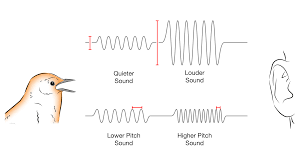

Our sense of hearing provides us rich information about our environment with
respect to the locations and characteristics of sound producing objects. For
example, we can effortlessly assimilate the sounds of birds twittering outside
the window. 

While audio compression has been the most prominent application of digital
audio processing, the gathering importance of data abundance is seeing growing applications of signal processing
in audio segmentation and classification. Audio classification is a part of the
larger problem of audiovisual data handling. Audio classification is also useful as a front end
to audio compression systems where the efficiency of coding and transmission
is facilitated by matching the compression method to the audio type, as for
example, speech or music. 

That is exactly what the problem description is in this competition! Identification of a wide variety of bird vocalizations in soundscape recordings which might have anthropogenic sounds (e.g., airplane overflights) or other bird and non-bird (e.g., chipmunk) calls in the background, with a particular labeled bird species in the foreground. 


<a id='evc'></a>
## Your Evaluation Metric:
![image1.png](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/320px-Precisionrecall.svg.png)

The evaluation metric in this competition is averaged F1-score which is quite simple to understand. Briefly, the F1 score is the harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall).

![image2.png](https://wikimedia.org/api/rest_v1/media/math/render/svg/3607c634303f2fd8b69ca4f9d97a491c45083cc5)

In this multiclass setup, the final F1 score is obtained by micro-averaging (biased by class frequency). Get to know about micro-averged F1-score better over [here](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin).

In [ ]:
import os
import numpy as np 
import pandas as pd
import datetime as dt
from sklearn import preprocessing as prep
import librosa as lb
import librosa.display as lbd
import librosa.feature as lbf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (16,8)
import IPython.display as ipd
import ipywidgets as ipw
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings('ignore')

link = 'https://ebird.org/species/'
audios = '../input/birdsong-recognition/train_audio/'

In [ ]:
train = pd.read_csv('../input/birdsong-recognition/train.csv')

<a id='exp'></a>
# Exploring the training data
## Excerpts from the official 'Data Description' about training data:

**train_audio:** The train data consists of short recordings of individual bird calls generously uploaded by users of xenocanto.org.

### The most directly relevant fields in 'train.csv' are:

* **ebird_code:** a code for the bird species.

* **recodist:** the user who provided the recording.

* **location:** where the recording was taken. Some bird species may have local call 'dialects', so you may want to seek geographic diversity in your training data.

* **date:** while some bird calls can be made year round, such as an alarm call, some are restricted to a specific season. You may want to seek temporal diversity in your training data.

* **filename:** the name of the associated audio file.


## Lets look the training data now:

In [ ]:
train

> ### We clearly see why the 'relevant fields' are relevant. The data contains information about the whereabouts and whenabouts of the recording for every bird. We have unique files for every different recordings which is specified by the column 'filename'.

## Let us look at the count and type of the data.

In [ ]:
train.info()

>### Thats good enough. Gives us idea about all the columns. Now lets move onto something more pleasing to the eyes!
<a id='msng'></a>
## plotly Visualization of missing data

In [ ]:
temp = pd.DataFrame({'Number of Missing Values': pd.Series(train.isnull().sum().sort_values(ascending=False)[:5])})
temp['Feature'] = temp.index; temp = temp.reset_index(drop=True)


plotly.offline.iplot(px.bar(temp, x = 'Number of Missing Values', y = 'Feature', orientation='h', title = 'Missing Values in training data', 
                            color = 'Feature', height=400, text = 'Number of Missing Values'))

>### No data from any relevant column is missing in the training data.
<a id='analy'></a>
# Analysing the "relevant fields" in the training data:
<a id='ebird'></a>
### ebird_code:

In [ ]:
temp = train.groupby(['ebird_code', 'species']).count().reset_index().sort_values(by='filename',ascending=True)

plotly.offline.iplot(px.bar(temp, x='filename', y='species', orientation='h', labels={'filename': 'Count', 'species':'Bird Name'}, hover_data=['species'],
       height=1500, width=800, color = 'filename', title='Count of Data Available for different bird species'))

> ### Almost half of the data has around 100 recordings for each bird species.

## Let's explore a few birds! 
(check the code toggle to see the code)

In [ ]:
col = sorted(list(train['ebird_code'].unique()))

for temp in range(2,8):
    ## SCRAPING FOR BIRD DESCRIPTION and IMAGE URL
    URL = str(link+col[temp]); page = requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser'); result = soup.find_all('p', class_='u-stack-sm')
    res = soup.find_all('figure', class_='MediaFeed-item'); 
    img = res[0].find_all('img')[0].get('src'); description = result[0].text

    ## PUTTING EVERYTHING IN A VARIABLE
    ad = os.listdir(str(audios+col[temp]))[10]
    df = train[train['filename']==ad].reset_index()
    spec = str(df['species'][0]+' ('+df['sci_name'][0] + ')')
    loc = df['location'][0]
    time = str(df['date'][0]+' (yyyy-mm-dd) '+df['time'][0]+' hrs')
    recordist = df['recordist'][0]
    elev = df['elevation'][0]

    ## DISPLAYING IN THE NOTEBOOK
    ipd.display(ipd.HTML('<head> <body> <h1 style = "font-size:46px; font-family:sans; background-color:Lavender;"> {} </h1>\
                            <p style="text-align:left; color:black; font-family:verdana; font-size:19px;"> <br> <img src= {} \
                            style="float:right;width:50%;height:50%;"> <br> &emsp; {}<br><br><b> Located at:</b>{}<br><b>Date & Time \
                            of recording:</b> {}<br><b>Elevation: </b>{}<br><b>Recordist: </b>{}</br></p>\
                            <h3 style = "font-family:verdana; font-size:26px">Audio:</h3> </body></head>'.format(spec,img,description,loc,time,elev,recordist)))
    ipd.display(ipd.Audio(str(audios+col[temp]+'/'+ad), embed=True))

In [ ]:
## WILL GIVE UP A WARNING TO USE 'audioread' INSTEAD. SUPPRESS IT BY 'warnings.filterwarnings'.
## GIVES WARNING AS LIBROSA IS NOT CAPABLE OF READING '.mp3' FILES AND FALLS BACK TO 'audioread' 
## WHEN GIVEN ONE. TAKES A BIT TIME TO LOAD.
ad = 'XC233159.mp3'
x, sr = lb.load(str(audios+col[temp]+'/'+ad))


# Pausing analysis for audio represention and feature generation of 'American Redstart (Setophaga ruticilla) '
<a id='panaly'></a>
# Audio representation:
<a id='wav'></a>
* ## Waveform or PCM
Speech signals are sound signals, defined as pressure variations travelling through the air. These variations in pressure can be described as waves and correspondingly they are often called sound waves.

We assume that the speech signals have been captured by a microphone and converted to a digital form. A speech signal is then represented by a sequence of numbers Xn , which represent the relative air pressure at time-instant n∈N. This representation is known as pulse code modulation often abbreviated as PCM. 
The accuracy of this representation depends on
* the Sampling Frequency(or Sampling rate)
* the Accuracy and Distribution of Amplitudes of Xn



### 1. Sampling rate:

Sampling is a method of reducing continuous-time signal to discrete-time signal. **A digital audio signal is obtained by the suitable sampling and quantization
of the electrical output of the microphone.**

Usually speech signals reside in the range 300 Hz to 3500 Hz, so the according sampling rate 'Fs' is determined by the Nyquist frequency, which is half the sampling rate Fs and defines the upper end of the largest bandwidth [0,Fs/2] which can be uniquely represented. So, for a Narrow-band sampling rate is determined to be 8 kHz. 

But, Some consonants, especially fricatives like /s/, however contain substantial energy above 4kHz, whereby narrow-band is not sufficient for high quality speech. Most energy however remains below 8kHz such that wide-band, that is, a sampling rate of 16 kHz is sufficient for most purposes. Super-wide band and full band further correspond to sampling rates of 32 kHz and 44.1 kHz. 

Read more about [Sampling](https://en.wikipedia.org/wiki/Sampling_(signal_processing)) and [Nyquist frequency](https://en.wikipedia.org/wiki/Nyquist_frequency).

### 2. Accuracy and distribution of steps on the amplitude axis

In digital representations of a signal we are forced to use a finite number of steps to describe the amplitude which is **we must quantize the signal to some discrete levels.**

Two types are prevalent:
* #### Linear quantization: 

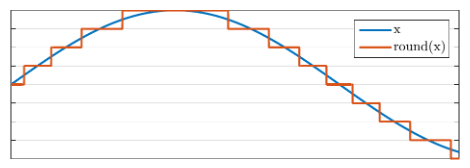
 
 Linear quantization with a step size Δq would correspond to defining the quantized signal as: 

  \\(\hat x = \Delta q\,\cdot {\mathrm{round}}(x/\Delta q)\\)
  
  The intermediate representation, y=round(x/Δq), can then be taken to represent, for example, signed 16-bit integers.
  

 

* #### Logarithmic quantization and mu-law: 

  To retain equal accuracy for loud and weak signals, we could quantize on an logarithmic scale as 

  \\(\hat x = {\mathrm{sign}}(x)\cdot\exp\left[
\Delta q\cdot\,{\mathrm{round}}
\left(\log\left(|x|\right)/\Delta q\right)
\right]\\)
                                               
  Benefit of this approach would be that we can encode signals on a much larger range and the quantization accuracy is relative to the signal magnitude. But, very small values prove to be fatal.
  
  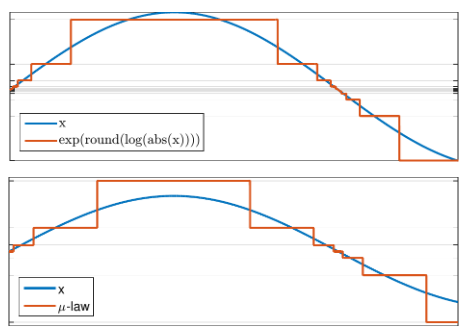
  
  
  A practical solution to this problem is quantization with the mu-law algorithm, which defines a modified logarithm as

  \\(F(x):={\mathrm{sign}}(x)\cdot\,\frac{\log\left(1+\mu|x|\right)}{\left(1+\mu\right)}\\)
                                                   
  By replacing the logarithm with F(x), we retain the properties of the logarithm for large x, but avoid the problems when x is small.

In [ ]:
lbd.waveplot(x,sr=sr); 
plt.title('Waveform of the audio recording:', size=20); plt.ylabel('Amplitude'); plt.show()

<a id='stft'></a>
* ## Spectrogram & STFT
We have a notion of what a high or low pitch means. Pitch refers to our perception of the frequency of a sound. The Fourier spectrum of a signal reveals such frequency content. This makes the spectrum an intuitively pleasing domain to work in, because we can visually examine signals. 

The [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform) of a function of time is a complex-valued function of frequency, whose magnitude (absolute value) represents the amount of that frequency present in the original function. 

By splitting the signal into shorter segments, we can focus on signal properties at a particular point in time. By [*windowing*](https://sites.uci.edu/computermusic/2013/05/14/windowing-an-audio-signal/) (refers to splitting the input signal into temporal segments) and taking the discrete Fourier transform (DFT) of each window, we obtain the short-time Fourier transform (STFT) of the signal. Specifically, for an input signal xn and window wn, the transform is defined as

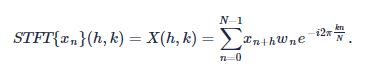

The STFT is one of the most frequently used tools in speech analysis and processing. It describes the evolution of frequency components over time. Like the spectrum itself, one of the benefits of STFTs is that its parameters have a physical and intuitive interpretation.

The output of the STFT is complex-valued (though where the spectrum is a vector, the STFT output is a matrix). As a consequence, we cannot directly visualize the complex-valued output. Instead, STFTs are usually visualized using their log-spectra, \\(20log_{10}(X(h,k))\\). Such 2 dimensional log-spectra can then be visualized with a heat-map known as a **Spectrogram.**

In [ ]:
X = lb.stft(x)

lbd.specshow(lb.amplitude_to_db(abs(X)),sr=sr,x_axis='time', y_axis='hz')
plt.xlabel('Time (in min:sec)'); plt.title('Short-time Fourier transform (Spectrogram):', size=20); plt.show()

> ### We get a rough estimation of pitch seems to be 5000-5500 Hz from the graph. We will calculate the pitch ahead and check our rough estimate.

<a id='panaly2'></a>
# Feature study of Audio for Classification

While the spectrogram and auditory signal representations discussed in the
previous section are good for visualization of audio content, they have a high
dimensionality which makes them unsuitable for direct application to classification.
Ideally, we would like to extract low-dimensional features from
these representations (or even directly from the acoustical signal) which
retain only the important distinctive characteristics of the intended audio
classes.

A well-designed
set of features for a given audio categorization task would make for robust
classification with reasonable amounts of training data. 

Years of research on audio signal features has given 2
broad categories of features: 
*  Physical Features 
    *  [Spectral Centroid](#sc)
    *  [Spectral Roll-off](#srf)
    *  [Spectral Bandwidth](#sbw)
    *  [Spectral Flux](#sf)
    *  [Spectral Contrast](#spc)
    *  [Spectral Flatness](#scf)
    *  [Zero-crossing rate](#zcr)
    *  [Autocorrelation](#acr)
     *  [Fundamental Frequency](#ff)
     *  [Tempo Estimation](#tmp)
    *  [Mel-Frequency Cepstral Coefficients](#mfcc)
    *  [Chromogram](#chr)
*  Perceptual Features
    *  Loudness:
           
      Loudness indicates the sensation of strength of signal. It can be approximately related to intensity as 
      
      \\(L=kI^{\alpha}\\)
      
      Value of \\(\alpha\\) is proven to be 0.23 in case of noise.
      
    *  Pitch:
    
      Pitch is a perceptual property of sounds that allows their ordering on a frequency-related scale, or more commonly, pitch is the quality that makes it possible to judge sounds as "higher" and "lower" in the sense associated with musical melodies. 

<a id='sc'></a>

## Spectral Centroid
The spectral centroid is commonly associated with the measure of the "brightness" of a sound.  It is widely used as an automatic measure of timbre.

This measure is obtained by evaluating the “center of gravity” using the Fourier transform’s frequency and magnitude information. It is calculated by dividing the spectrogram into frames and calculating the weighted mean for that frame. 

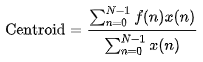

f(n) represents the center frequency and x(n) represents the magnitude, of bin number n, corresponding to the Spectrogram.

I think of it as the "main frequency" present in your sound at that particular *time frame* during the recording. Refer to [this](https://ccrma.stanford.edu/~unjung/AIR/areaExam.pdf) article for a deeper study into the topic.

**librosa.feature.spectral_centroid** returns an array with columns equal to the number of frames present in your sample (discussed above)

In [ ]:
sc = lbf.spectral_centroid(x, sr=sr)[0]; frames = range(len(sc)); t = lb.frames_to_time(frames)

lbd.waveplot(x, sr=sr)
plt.title('Spectral Centroid visualized', size=25)
## NORMALIZING THE VALUES OF SPECTRAL CENTROID BEFORE PLOTTING TO COMPARE WITH WAVEFORM
plt.plot(t, prep.minmax_scale(sc), linewidth=0.8, color='r'); plt.show()

In [ ]:
X = lb.stft(x)

plt.figure(figsize=(20,8)); lbd.specshow(lb.amplitude_to_db(abs(X)),sr=sr,x_axis='time', y_axis='log')
plt.xlabel('Time (in min:sec)'); plt.title('Spectrogram with spectral centroids:', size=25); plt.plot(t, sc, linewidth=0.8, color='black'); plt.colorbar(); plt.show()

<a id='srf'></a>
## Spectral Roll-off

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies. It
was first used as feature to separate voiced and
unvoiced signal. It is calculated as, \\(R_r = f[K]\\)

where K is the largest bin that fullfills,
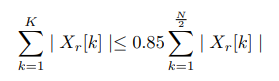
 
 **librosa.feature.spectral_rolloff** computes the rolloff frequency for each frame in a signal:

In [ ]:
spectral_rolloff = lbf.spectral_rolloff(x+0.01, sr=sr)[0]

lbd.waveplot(x, sr=sr)
plt.plot(t, prep.minmax_scale(spectral_rolloff), color='r', label='Spectral Roll-off'); plt.title('Spectral Roll-off visualized', size=25); plt.legend(); plt.show()

<a id='sbw'></a>
## Spectral Bandwidth

The spectral bandwidth is defined as the extent of the power transfer function
around the the center frequency.

**librosa.feature.spectral_bandwidth** computes the order-p  spectral bandwidth:
\\(\left( \sum_k S(k) \left(f(k) - f_c \right)^p \right)^{\frac{1}{p}}\\)

where \\(S(k)\\) is the spectral magnitude at frequency bin \\(k\\), \\(f(k)\\) is the frequency at bin \\(k\\), and \\(f_c\\) is the spectral centroid. When \\(p=2\\), this is like a weighted standard deviation.

In [ ]:
spectral_bandwidth = lbf.spectral_bandwidth(x+0.01, sr=sr, p=2)[0]

lbd.waveplot(x,sr)
plt.plot(t, prep.minmax_scale(spectral_bandwidth), color='r', label='Spectral Bandwidth'); plt.title('Spectral Bandwidth visualized', size=25); plt.legend(); plt.show()

<a id='sf'></a>
## Spectral Flux
A measure of how quickly the spectrum of a signal is changing. It is calculated by computing frame-to-frame squared difference of the spectral magnitude
vector summed across frequency as

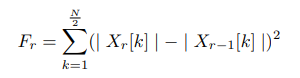

It provides a measure of the local spectral rate of change. A high value of
spectral flux indicates a sudden change in spectral magnitudes and therefore
a possible segment boundary at the \\(r^{th}\\) frame.

In [ ]:
spectral_flux = lb.onset.onset_strength(x, sr); onset_default = lb.onset.onset_detect(x, sr, units='time')

plt.plot(t, spectral_flux, label='Spectral flux'); plt.vlines(onset_default, 0, spectral_flux.max(), color='r', label='Onsets');plt.title('Spectral Flux Visualized', size=25)
plt.legend(); plt.show()

<a id='spc'></a>
## Spectral Contrast
Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by comparing the mean energy in the peak energy to that of the valley energy. High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.

In [ ]:
spectral_contrast = lbf.spectral_contrast(x, sr)

plt.figure(figsize=(20,8)); lbd.specshow(spectral_contrast, x_axis='time'); plt.ylabel('Frequency bands'); plt.colorbar(); plt.title('Spectral contrast Visualized', size=25); plt.show()

<a id='scf'></a>
## Spectral Flatness
 The spectral flatness measure describes the noisiness versus sinusoidality of
signal. If there is a sinusoidal structure, the spectral flatness is zero. If the signal
consists mainly of noise, the spectral flatness measure is near one. It is given by:
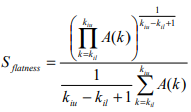

In [ ]:
flatness = lbf.spectral_flatness(x); 

plt.figure(figsize=(20,8)); lbd.specshow(flatness, x_axis='time'); plt.colorbar(); plt.title('Spectral flatness Visualized', size=25); plt.show()

Not much noise in our audio.
<a id='zcr'></a>
## Zero-crossing rate

Bird song is best developed in the order Passeriformes (also known as songbirds), which includes more than half of all bird species. Some other groups are nearly voiceless, producing only percussive and rhythmic sounds. 

Given such a peculiar behaviour, analysis of zero-crossing rate, which is a key feature to classify percussive sounds, becomes important. Additionally, you also get to know about the smoothness as voiced speech sounds are more smooth than unvoiced ones.

Zero-crossing rate is the rate of sign-changes along a signal and formally defined as 

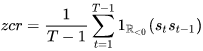

To calculate of the zero-crossing rate of a signal you need to compare the sign of each pair of consecutive samples. In other words, for a length N signal you need O(N) operations.

Lets look at an example:

In [ ]:
p, q = 1650, 1700
plt.figure(figsize=(16,8)); plt.plot(x[p:q]); plt.title('Zero crossing rate between {} and {}:'.format(p,q)); plt.show()

>### Looks like 20 Zero crossings to me. Lets check it out by the library function provided in librosa.

In [ ]:
zc = lb.zero_crossings(x[p:q])
zc.shape

>### 'librosa.zero_crossings' computed a binary mask where **True** indicates the presence of a zero crossing. To find the total number of zero crossings, we use sum:

In [ ]:
print('Zero crossings: ', sum(zc))

>### Lets find the zero-crossing rate over time:

In [ ]:
zcr = lbf.zero_crossing_rate(x)

plt.figure(figsize=(16,8)); plt.plot(zcr[0]); plt.title('Zero crossing rate over time:', size=25); plt.show()

A drawback of zero-crossings is that the number of zero-crossings in a segment is an integer number. A continuous-valued measure would allow more detailed analysis.

Hence, an alternative to the zero-crossing rate is to calculate the autocorrelation at lag-1. It can be estimated also from short segments, it is continuous-valued and arithmetic complexity is also O(N).

<a id='acr'></a>
## Autocorrelation

Speech signals typically have such structure that samples near in time to each other are similar in amplitude. Samples of the signal are correlated with the preceding and following samples. Such structures are in statistics measured by covariance and correlation.

"Autocorrelation" is used to compare a signal with a time-delayed version of itself. If a signal is periodic, then the signal will be perfectly correlated with a version of itself if the time-delay is an integer number of periods. 

The autocorrelation is useful for finding repeated patterns in a signal. For example, at short lags, the autocorrelation can tell us something about the signal's fundamental frequency. For longer lags, the autocorrelation may tell us something about the tempo of a musical signal.

\\(\begin{split}
\text{autocorrelation:} & c_{k} = \frac{E_n[x_nx_{n-k}]}{E_n[x_n^2]} = \frac{r_k}{r_0}.
\end{split}\\)

In this equation,  k  is often called the lag parameter.  \\(c_{k}\\)  is maximized at  k=0  and is symmetric about  k.

In [ ]:
ar = lb.autocorrelate(x, max_size=10000)

plt.figure(figsize=(16,8)); plt.plot(ar); plt.xlim(0,10000); plt.xlabel('Lag'); plt.title('Autocorrelation over lag:', size=25); plt.show()

**librosa.autocorrelate** only keeps one half of the autocorrelation function, since the autocorrelation is symmetric.
<a id='ff'></a>
* ### Pitch Estimation or Fundamental Frequency (F\\(_0\\)):
    It is computed by measuring the periodicity of the time-domain waveform.
    It may also be estimated from the signal spectrum as the frequency of the
    first harmonic or as the spacing between harmonics of the periodic signal. 
    
    The autocorrelation is used to find repeated patterns within a signal. A repeated pattern can correspond to a pitch period. We can, therefore, use the autocorrelation function to estimate the pitch in an audio signal.

    The autocorrelation always has a maximum at zero, i.e. zero lag. We want to identify the maximum outside of the peak centered at zero. Therefore, we might choose only to search within a range of reasonable pitches:

In [ ]:
## SETTING THE SEARCH RANGE OF THE PITCH
f_hi = lb.midi_to_hz(120)
f_lo = lb.midi_to_hz(12)

## SETTING THE INVALID PITCH RANGE TO ZERO
t_lo = sr/f_hi
t_hi = sr/f_lo
ar[:int(t_lo)] = 0
ar[int(t_hi):] = 0

In [ ]:
plt.figure(figsize=(16,8)); plt.plot(ar[:1400]); plt.title('Autocorrelation within a range (0 to 1400)', size=25); plt.show()

>### Finally, the estimated the pitch in Hertz:

In [ ]:
float(sr)/ar.argmax()

>### This goes well with our above visualization of "Spectrogram with Spectral Centroid" which gave us a rough estimate of pitch to be around 7300 Hz.

<a id='tmp'></a>
* ### Tempo Estimation:
    Tempo refers to the speed of a musical piece. More precisely, tempo refers to the rate of the musical beat and is given by the reciprocal of the beat period. Tempo is defined in units of beats per minute (BPM).
    
    Beat is when you tap your foot when listening to music. The same thing Queen does in the beginning of 'We will Rock You' is a beat (and noise made rhythm). [Listen](https://www.youtube.com/watch?v=-tJYN-eG1zk) and know!
    
    We estimate tempo in three steps:
     * Onset detection
     * Beat tracking
     * and finally - Tempo estimation
     
     
 To detect note onsets, we want to locate sudden changes in the audio signal that mark the beginning of transient regions. Often, an increase in the signal's amplitude envelope will denote an onset candidate. Novelty functions are functions which denote local changes in signal properties such as energy or spectral content.  
 
 Hence, computing the onset envelope or novelty function: 

In [ ]:
hop_length = 200 ## Samples to be taken per frame
onset = lb.onset.onset_strength(x, sr=sr, hop_length=hop_length, n_fft=2048)

## PLOTTING THE ONSET ENVELOPE
frames = range(len(onset)); t = lb.frames_to_time(frames,sr,hop_length=hop_length)

plt.figure(figsize=(16,8)); plt.plot(t,onset); plt.xlabel('Time (in sec)'); plt.title('Novelty Function', size=25); plt.show()

>### We can visually understand from the Novelty Function plotted above that our audio has a lot of noise comes from the background noise of nature where the audio might have been recorded.

In [ ]:
S = lb.stft(onset, hop_length=1, n_fft=512)
ft = np.absolute(S)

plt.figure(figsize=(16,8)); lbd.specshow(ft,sr=sr,hop_length=hop_length, x_axis='time'); plt.title('Fourier Tempogram', size=25); plt.xlabel('Time (in min:sec)'); plt.show()

>### 'librosa.feature.tempogram' implements an autocorrelation tempogram, a short-time autocorrelation of the (spectral) novelty function for us. So thats a lot less work for us we need not worry about (only till you know whats going on under the hood)!

In [ ]:
tempogram = lbf.tempogram(onset_envelope=onset, sr=sr, hop_length=hop_length, win_length=400)

plt.figure(figsize=(16,8)); lbd.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo');
plt.title('Tempogram Visualized', size=25); plt.xlabel('Time (in min:sec)'); plt.show()

>### We will use 'librosa.beat.tempo' to estimate the global tempo in an audio file.

In [ ]:
tempo = lb.beat.tempo(x, sr=sr)
print(tempo[0])

In [ ]:
t = len(x)/float(sr)
seconds_per_beat = 60/tempo[0]
beat_times = np.arange(0, t, seconds_per_beat)

plt.figure(figsize=(16,8)); lbd.waveplot(x); plt.vlines(beat_times, -1, 1, color='r'); plt.title('Tempo Visualized', size=25); plt.show();

>### As already discussed, this does not come as a surprise to us given the audio has a lot of noise in the background. We would need to use some transformation to reduce the noise or amplification techniques during preprocessing.
<a id='mfcc'></a>
## Mel-Frequency Cepstral Coefficients (MFCC)
MFCC are perceptually motivated features that provide a compact representation of the short-time spectrum envelope. 

To compute the MFCC:
* Take the Fourier transform of a signal window.
* Map the power of the spectrum obtained above into the Mel scale, using triangular overlapping windows.
* Take the log of the powers at each of Mel frequencies.
* Take the discrete cosine transform of the list of Mel log powers, as if it were a signal.
* The MFCCs are the amplitudes of the resulting spectrum. 

Thankfully **librosa.feature.mfcc** computes MFCCs across an audio signal.

In [ ]:
mfccs = lbf.mfcc(x, sr)
mfccs.shape

>### mfcc computed 20 MFCCs over 222 frames.

>### The 0th coefficient of the MFCC conveys a constant offset and hence is discarded when performing classification. For now, we will move forward with the MFCCs as is.

In [ ]:
plt.figure(figsize=(20,8)); lbd.specshow(prep.minmax_scale(mfccs, axis=1), sr=sr, x_axis='time')
plt.colorbar(); plt.title('MFCCs Visualized', size=25); plt.show()

<a id='chr'></a>
## Chromagram

Chroma features show a high degree of robustness to variations in timbre and closely correlate to the musical aspect of harmony. This is the reason why chroma features are a well-established tool for processing and analyzing musical data. 

For example, every chord recognition procedure relies on some kind of chroma representation. Chroma features have turned out to be a powerful mid-level feature representation in content-based audio retrieval such as cover song identification, audio matching or audio hashing.

In [ ]:
chrom = lbf.chroma_stft(x)

plt.figure(figsize=(20,8)); lbd.specshow(chrom, sr=sr, y_axis='chroma', x_axis='time'); plt.colorbar(); 
plt.title('Chromagram Visualized', size=25); plt.show()

<a id='contrf'></a>
# Continuing with other "relevant field" analysis:
<a id='location'></a>
### date & location:

*  Which location is the most common?
*  How are the location geographically located?

In [ ]:
countries = train['country'].unique()
colors = ['blue', 'red', 'green', 'black', 'lavender']

fig = go.Figure(data=go.Scattergeo(lon=train['longitude'], lat = train['latitude'], mode='markers', text = train['location'], marker=dict(size=4,
                                                                                                               opacity=0.6,
                                                                                                               symbol='square',
                                                                                                               line=dict(width=1,
                                                                                                                        color='white'),
                                                                                                               colorscale='Blues',
                                                                                                               color='blue')))
fig.update_layout(geo_scope='world', title = 'Recordings from world'); 

plotly.offline.iplot(fig)

In [ ]:
fig = go.Figure(data=go.Scattergeo(lon=train['longitude'], lat = train['latitude'], mode='markers', text = train['location'], marker=dict(size=4,
                                                                                                               opacity=0.6,
                                                                                                               symbol='square',
                                                                                                               line=dict(width=1,
                                                                                                                        color='white'),
                                                                                                               colorscale='Blues',
                                                                                                               color='blue')))
fig.update_layout(geo_scope='usa', title = 'Recordings from USA'); 

plotly.offline.iplot(fig)

In [ ]:
fig = go.Figure(data=go.Scattergeo(lon=train['longitude'], lat = train['latitude'], mode='markers', text = train['location'], marker=dict(size=4,
                                                                                                               opacity=0.6,
                                                                                                               symbol='square',
                                                                                                               line=dict(width=1,
                                                                                                                        color='white'),
                                                                                                               colorscale='Blues',
                                                                                                               color='blue')))
fig.update_layout(geo_scope='europe', title = 'Recordings from Europe'); 

plotly.offline.iplot(fig)

<a id='recordist'></a>
### recordist:
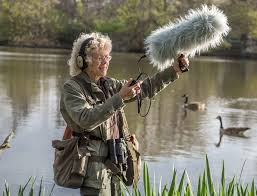
* Where are the recordists from?
* Which recordist has contributed the most number of recordings?
* Which species has been covered by most recordists?
* What are the average ratings of recordists?

In [ ]:
fig = make_subplots(2,2,
                    specs = [[{},{}],[{'colspan':2},None]],
                    subplot_titles=('Where are the recordists from?', 'How many recordings each recordist has contributed?', 'What are the average ratings of recordists?'))

temp = train.groupby(['country']).count().reset_index().sort_values(by='recordist'); 
fig.add_trace(go.Bar(x= temp['recordist'], y = temp['country'], orientation='h', name='Ans 1', marker=dict(color='violet',line=dict(color='black',width=0.3))),1,1)

temp =train.groupby(['recordist']).count().reset_index().sort_values(by='filename'); 
fig.add_trace(go.Bar(x=temp['filename'], y=temp['recordist'],orientation='h',name='Ans 2',marker=dict(color='indianred',line=dict(color='black',width=0.3))), 1,2)

temp = pd.DataFrame(train.groupby(['recordist'])['rating'].sum()).reset_index(); temp1 = pd.DataFrame(train.groupby(['recordist'])['filename'].count()).reset_index()
temp['rating'] = round(temp['rating']/temp1['filename'],1); 
fig.add_trace(go.Bar(x=temp.sort_values('rating')['rating'], y = temp.sort_values('rating')['recordist'],orientation='h',name='Ans 3', marker=dict(color='green',line=dict(color='black',width=0.1))),2,1)

fig.update_layout(height=1500, title_text='Exploring recordists'); 
plotly.offline.iplot(fig)

<a id='ref'></a>
## References:-
* [Getting Started with Audio Data Analysis using Deep Learning (with case study)](https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/)
* [YouTube video](https://www.youtube.com/watch?v=m3XbqfIij_Y&t=1626s) by [Valerio Velardo - The Sound of AI](https://www.youtube.com/channel/UCZPFjMe1uRSirmSpznqvJfQ) on Understanding audio data for deep learning
* [librosa documentation](https://librosa.org/librosa/tutorial.html)
* https://ipython.org/ipython-doc/3/api/generated/IPython.display.html
* https://en.wikipedia.org/wiki/Bird_vocalization
* https://en.wikibooks.org/wiki/LaTeX/Mathematics

<a id='fread'></a>
## Further readings:-
* https://www.asee.org/documents/zones/zone1/2008/student/ASEE12008_0044_paper.pdf